In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
user_table = pd.read_csv('combyne_users.csv')

In [4]:
user_table.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [5]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       19066 non-null  float64
 1   created_at    19066 non-null  object 
 2   company_id    19066 non-null  float64
 3   language      19066 non-null  object 
 4   activated_at  9381 non-null   object 
 5   state         19066 non-null  object 
dtypes: float64(2), object(4)
memory usage: 893.8+ KB


In [6]:
event_table = pd.read_csv('combyne_events.csv')

In [7]:
event_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      340832 non-null  float64
 1   occurred_at  340832 non-null  object 
 2   event_type   340832 non-null  object 
 3   event_name   340832 non-null  object 
 4   location     340832 non-null  object 
 5   device       340832 non-null  object 
 6   user_type    325255 non-null  float64
dtypes: float64(2), object(5)
memory usage: 18.2+ MB


In [8]:
event_table.occurred_at.describe()

count                  340832
unique                 304922
top       2014-06-16 09:31:59
freq                       12
Name: occurred_at, dtype: object

In [9]:
email_table = pd.read_csv('combyne_emails.csv')

In [10]:
email_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      90389 non-null  float64
 1   occurred_at  90389 non-null  object 
 2   action       90389 non-null  object 
 3   user_type    90389 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


In [11]:
event_table.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,4.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0
1,4.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0
2,4.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0
3,4.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0
4,4.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0


In [12]:
event_table.occurred_at[0].split(' ')[0][-5:]

'05-13'

In [13]:
event_table['date'] = event_table['occurred_at'].apply(lambda x: x.split(' ')[0][-5:])

In [14]:
event_table

,user_id,occurred_at,event_type,event_name,location,device,user_type,date
0,4.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,05-13
1,4.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0,05-13
2,4.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0,05-13
3,4.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0,05-13
4,4.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,05-24
...,...,...,...,...,...,...,...,...
340827,19063.0,2014-08-31 07:12:09,signup_flow,complete_signup,Brazil,ipad mini,3.0,08-31
340828,19063.0,2014-08-31 07:11:40,signup_flow,enter_info,Brazil,ipad mini,NaN,08-31
340829,19063.0,2014-08-31 07:12:09,engagement,login,Brazil,ipad mini,3.0,08-31
340830,19064.0,2014-08-31 17:45:18,signup_flow,create_user,United States,iphone 5s,NaN,08-31


In [15]:
event_table.date.value_counts().sort_index()

05-01    3061
05-02    4005
05-03    1338
05-04     745
05-05    2723
         ... 
08-27    2851
08-28    3068
08-29    3769
08-30    1549
08-31     872
Name: date, Length: 123, dtype: int64

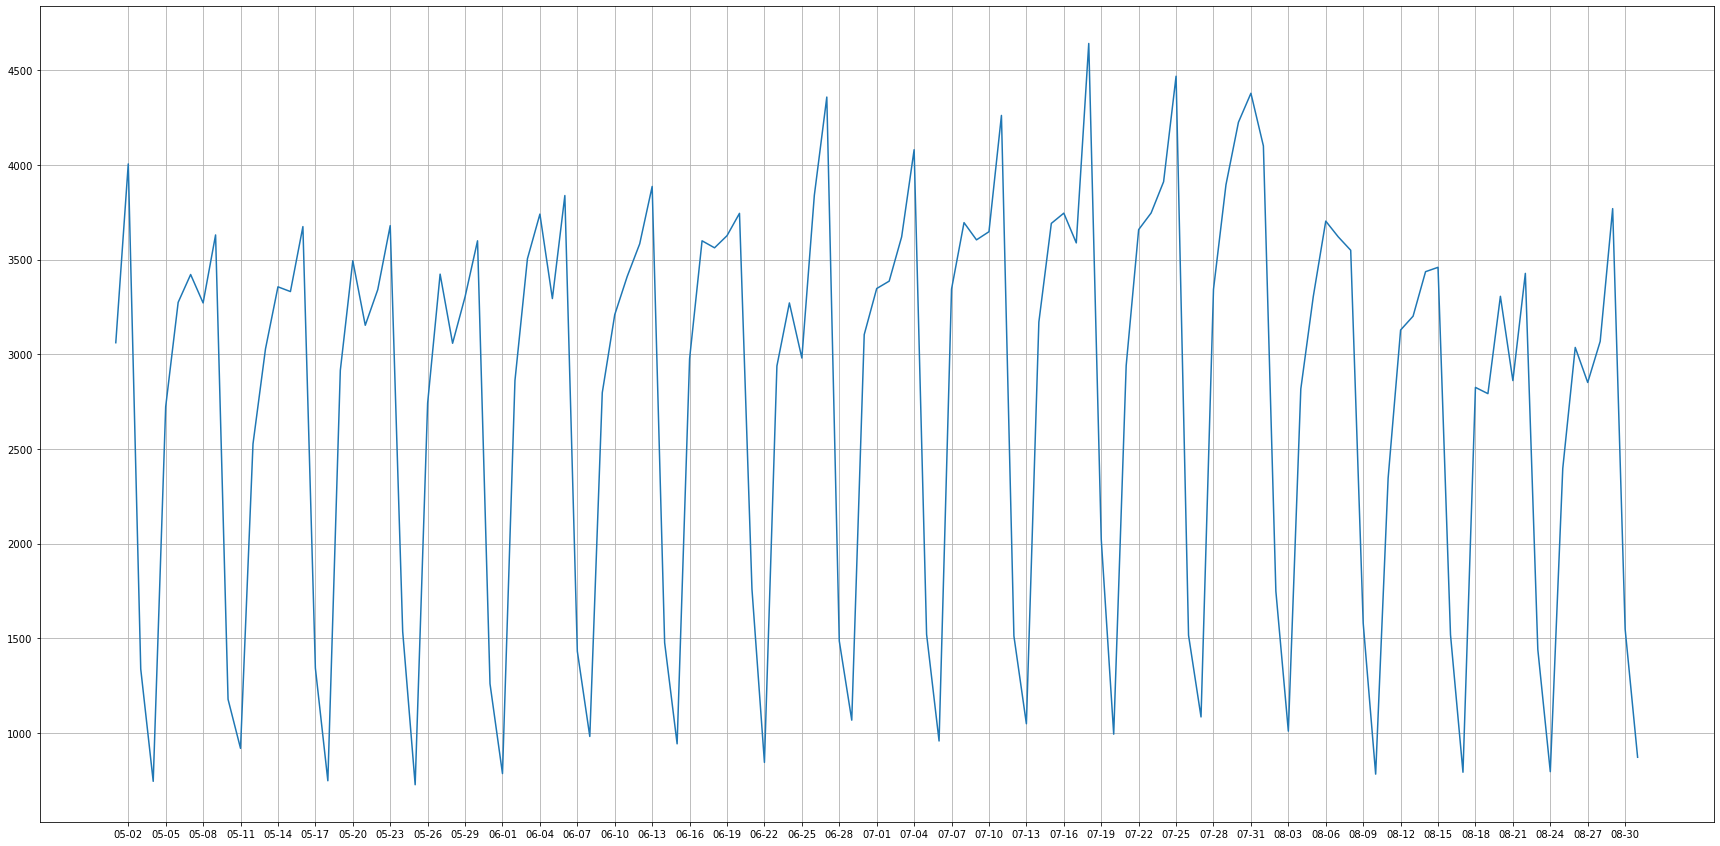

In [16]:
plt.figure(figsize=(30,15))
pic = plt.plot(event_table.date.value_counts().sort_index())
plt.xticks(plt.xticks()[0][1::3])
plt.grid()

The periodic fluctuation we are seeing here is due to the fact that users are more active during the weekdays, the amount of engagements logged are highered in weekdays thant in the weekends. However, we observe that the trend of total amount of engagements decreased after Aug.3.

In [17]:
event_freq = event_table.event_name.value_counts().sort_index()

In [18]:
event_freq

complete_signup            3680
create_user                7298
enter_email                4407
enter_info                 3872
home_page                 94065
like_message              59248
login                     38610
search_autocomplete       17820
search_click_result_1      1413
search_click_result_10      506
search_click_result_2      1499
search_click_result_3      1134
search_click_result_4      1264
search_click_result_5       968
search_click_result_6       805
search_click_result_7       709
search_click_result_8       690
search_click_result_9       784
search_run                13019
send_message              33105
view_inbox                55936
Name: event_name, dtype: int64

In [19]:
search_sum = event_freq[8:18].sum()
search_sum

9772

In [20]:
event_freq = event_freq.append(pd.Series(search_sum,index=['search_click']))

In [21]:
event_freq = event_freq.sort_index()

In [22]:
for i in range(1,11):
    event_freq = event_freq.drop(labels=["search_click_result_"+str(i)])

In [23]:
event_freq

complete_signup         3680
create_user             7298
enter_email             4407
enter_info              3872
home_page              94065
like_message           59248
login                  38610
search_autocomplete    17820
search_click            9772
search_run             13019
send_message           33105
view_inbox             55936
dtype: int64

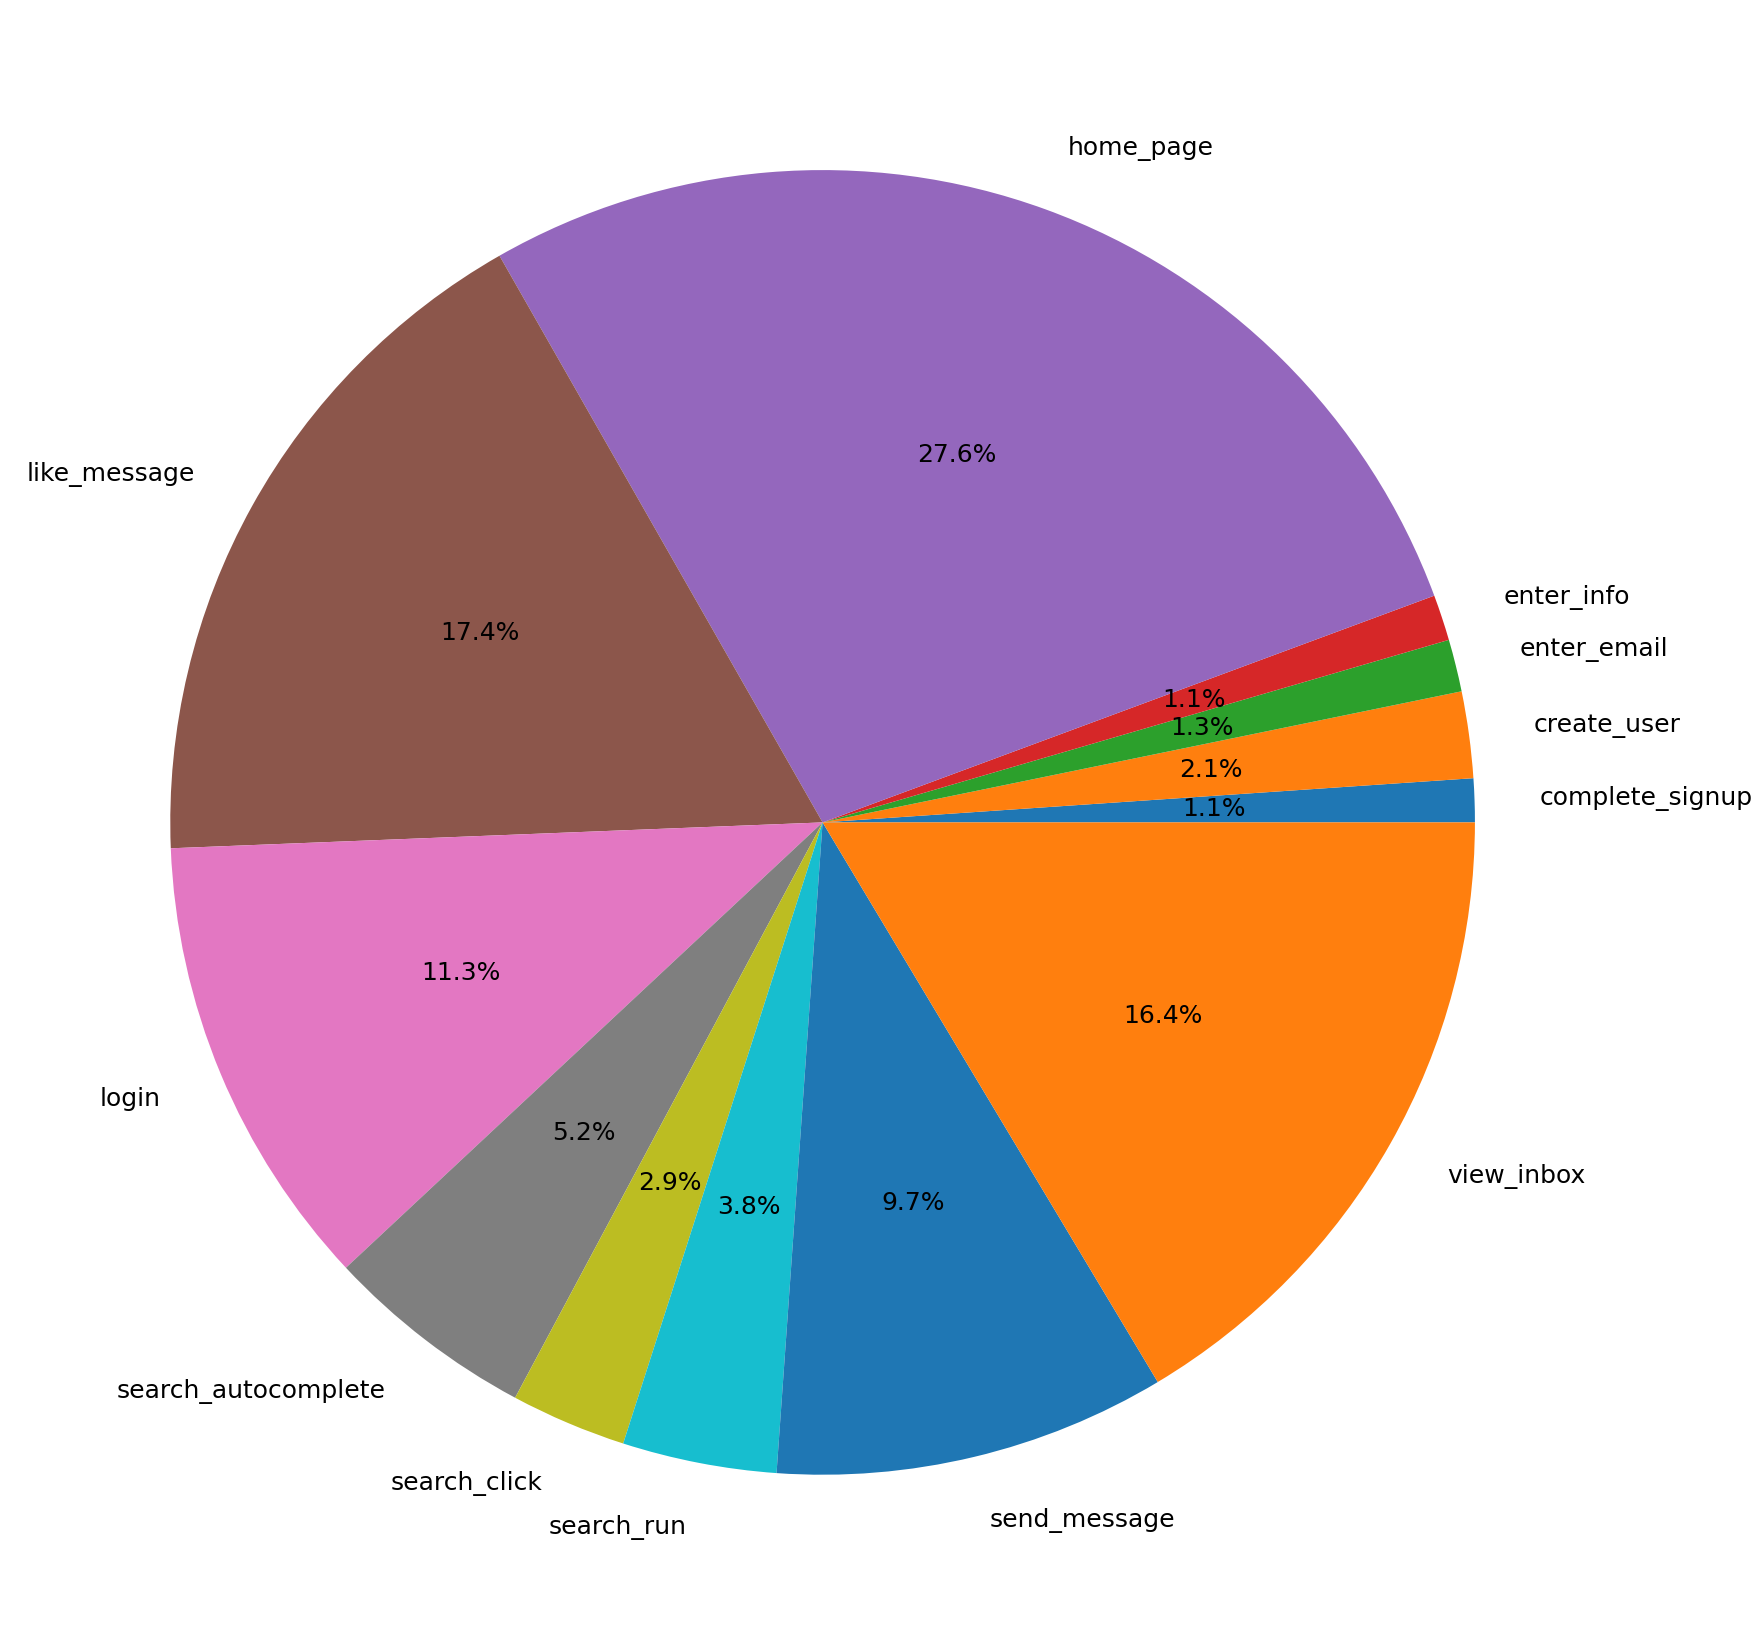

In [24]:
plt.figure(figsize=(30,30))
pie = plt.pie(event_freq,labels=event_freq.index,textprops={'fontsize': 25},autopct='%1.1f%%')


In [25]:
# for index,event in event_table.iterrows():
#     print(index,event.date)

Starting from Jul.25 to Aug.31, compare the compositions of the events in the five weeks

In [26]:
decop_event = event_table[event_table.date>="07-28"].sort_values(['date'])

In [27]:
#ticks = ['08-03','08-10','08-17','08-24','08-31']
decop_event['week_group'] = 0

In [28]:
def week_group(date):
    if date<='08-03':
        return 1
    elif date<='08-10':
        return 2
    elif date<='08-17':
        return 3
    elif date<='08-24':
        return 4
    elif date<='08-31':
        return 5

In [29]:
decop_event.week_group = decop_event.date.apply(week_group)

In [30]:
decop_event

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week_group
309947,16794.0,2014-07-28 13:35:03,engagement,send_message,United States,acer aspire desktop,3.0,07-28,1
45186,2690.0,2014-07-28 09:32:47,engagement,view_inbox,United Kingdom,lenovo thinkpad,2.0,07-28,1
45185,2690.0,2014-07-28 09:32:09,engagement,home_page,United Kingdom,lenovo thinkpad,2.0,07-28,1
45184,2690.0,2014-07-28 09:31:26,engagement,login,United Kingdom,lenovo thinkpad,2.0,07-28,1
260869,14628.0,2014-07-28 09:34:08,engagement,like_message,Philippines,macbook pro,2.0,07-28,1
...,...,...,...,...,...,...,...,...,...
339139,18797.0,2014-08-31 09:35:11,engagement,home_page,Australia,iphone 4s,1.0,08-31,5
339138,18797.0,2014-08-31 09:34:50,engagement,view_inbox,Australia,iphone 4s,1.0,08-31,5
339137,18797.0,2014-08-31 09:34:19,engagement,home_page,Australia,iphone 4s,1.0,08-31,5
339144,18797.0,2014-08-31 09:34:31,engagement,search_run,Australia,iphone 4s,1.0,08-31,5


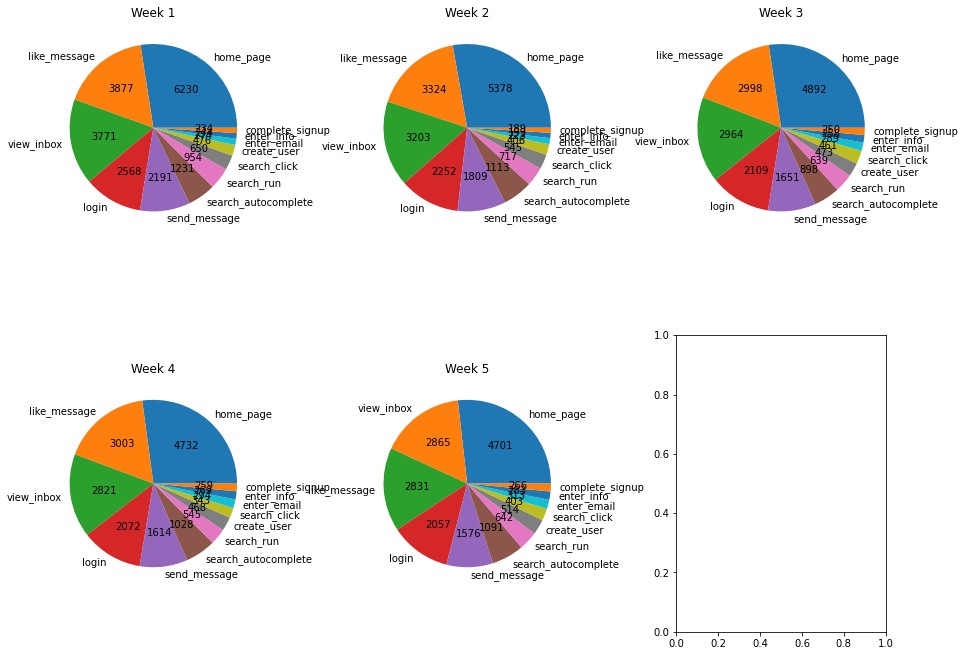

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

for i in range(1,6):
    week_events = decop_event[decop_event.week_group==i]
    week_sum = week_events.event_name.value_counts().sort_index()
    search_sum = week_sum[8:18].sum()
    week_sum = week_sum.append(pd.Series(search_sum,index=['search_click']))
    week_sum = week_sum.sort_index()
    for j in range(1,11):
        week_sum = week_sum.drop(labels=["search_click_result_"+str(j)])
    total = week_sum.sum()
    ax = axes[(i-1)//3, (i-1)%3]
    week_sum = week_sum.sort_values(ascending=False)
    ax.pie(week_sum,labels=week_sum.index,textprops={'fontsize':10},autopct= lambda p: '{:.0f}'.format(p * total / 100))
    ax.set_title("Week "+str(i))
fig.subplots_adjust(wspace=.5)

home_page visits decreased, like_message decreased, login decreased, messanges sent decreased, new users increased. This indicates the social interaction between users, such as like message and send message is decreasing, which leads to a total decrease in engagements.

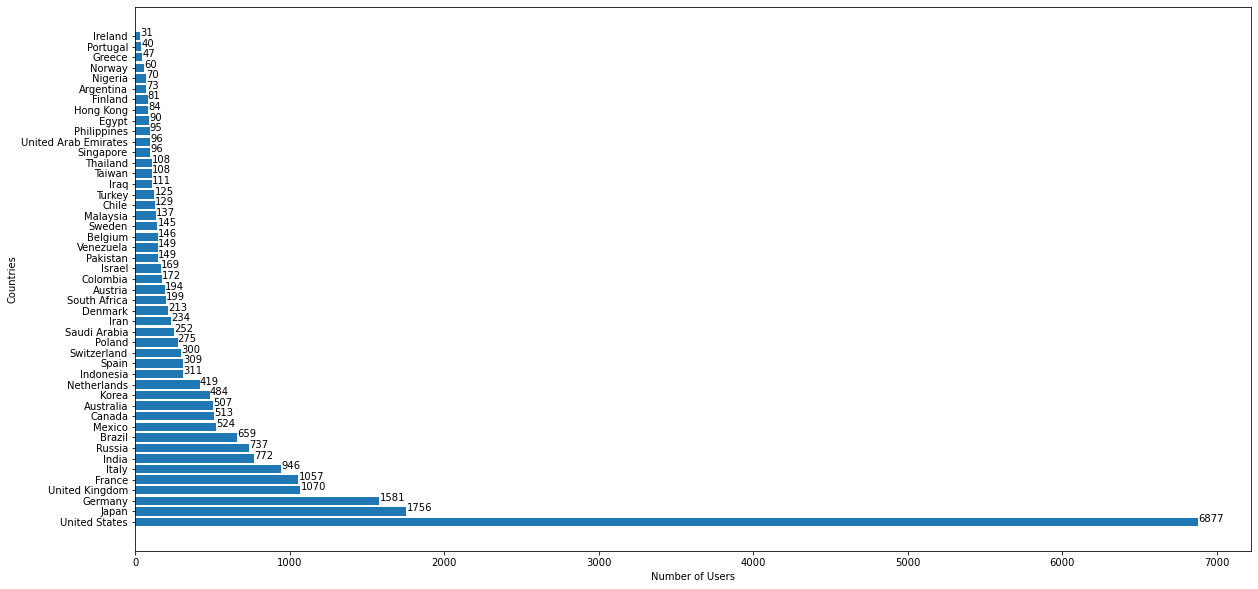

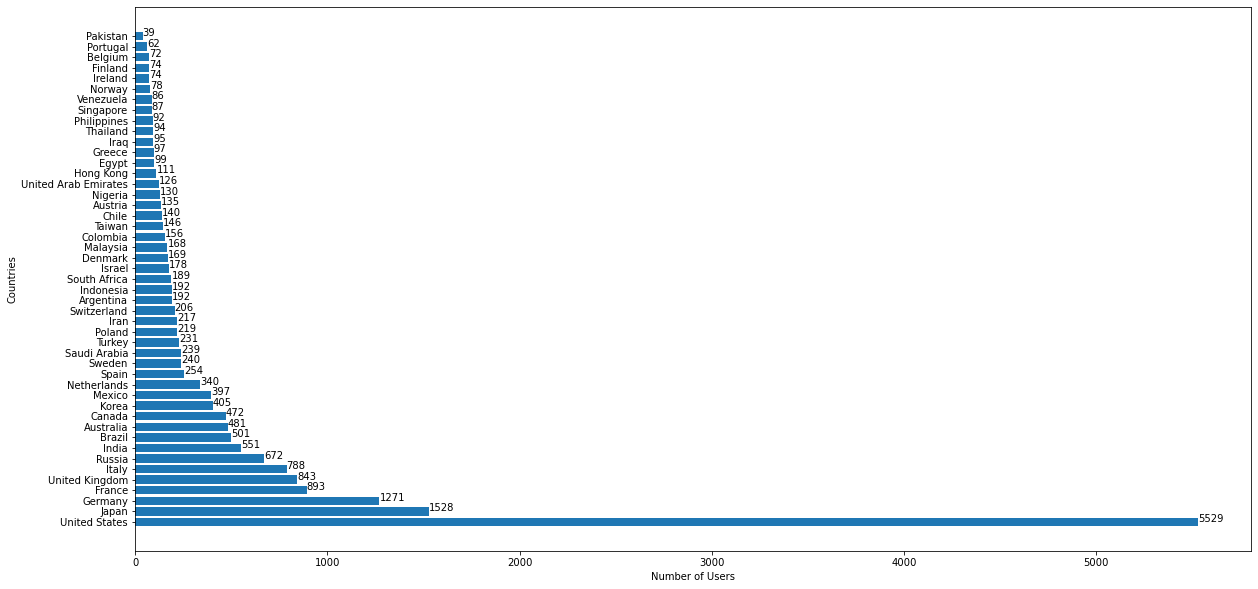

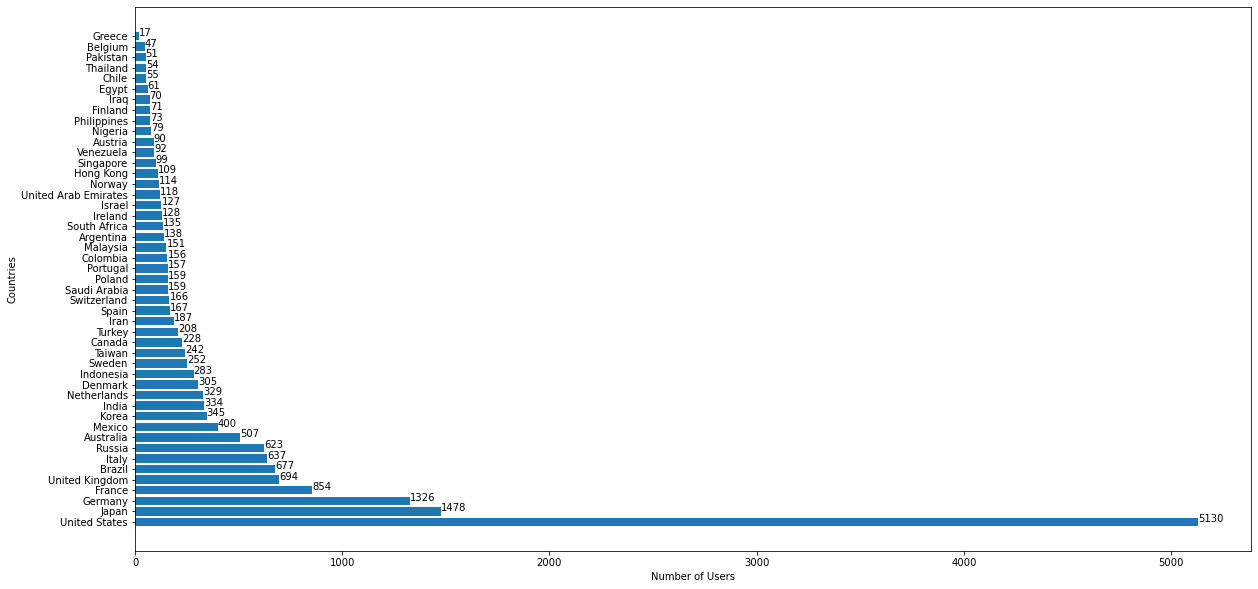

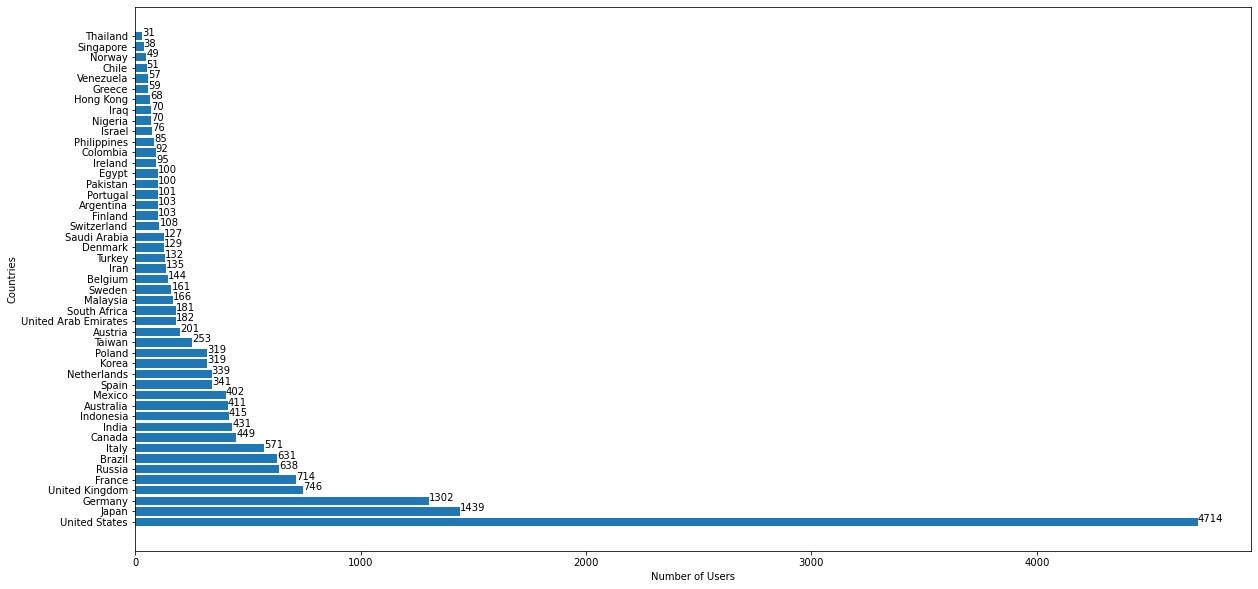

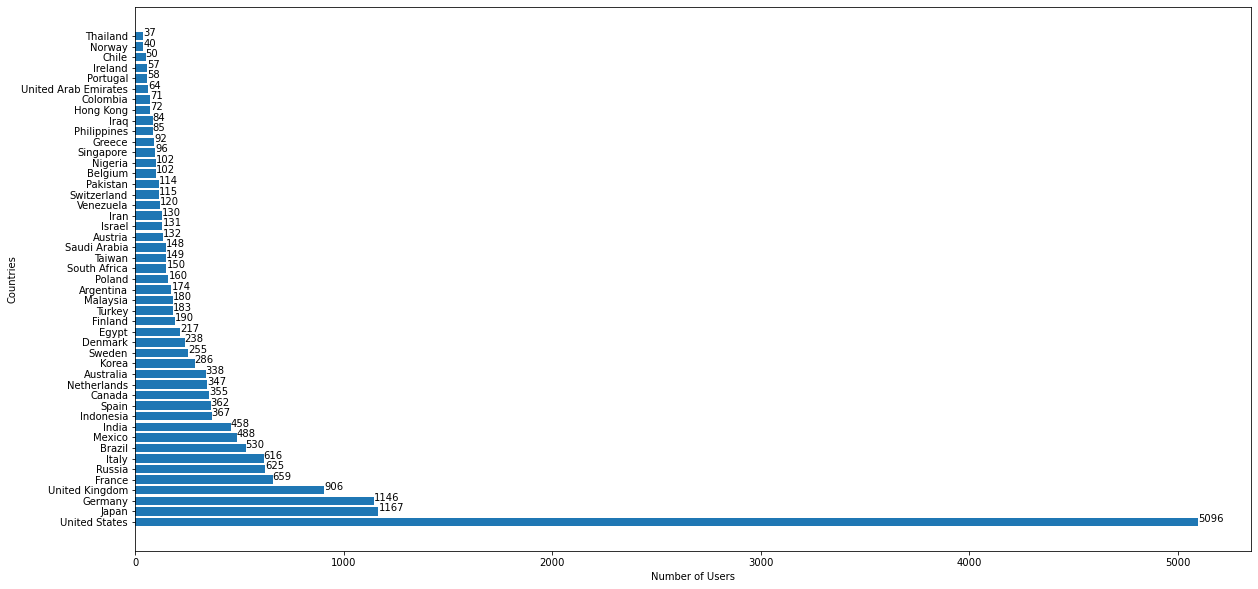

In [32]:
for j in range(1,6):

    country_decop = decop_event[decop_event.week_group==j].location.value_counts(ascending=False)

    plt.figure(figsize=(20,10))
    plt.barh(country_decop.index, country_decop.values)
    plt.xlabel('Number of Users')
    plt.ylabel('Countries')
    for i in range(country_decop.count()):
        plt.text(x=country_decop[i]+0.1, y = i, s=country_decop[i] )

Let us see the change of users in different countries in the five weeks excluding newly registered actions

In [33]:
country_user_wk1 = decop_event[(decop_event.week_group==1) & (decop_event.event_type=='engagement')].location.value_counts().sort_index()
country_user_wk5 = decop_event[(decop_event.week_group==5) & (decop_event.event_type=='engagement')].location.value_counts().sort_index()

In [34]:
country_user_wk1.describe()

count      47.000000
mean      456.851064
std       976.274284
min        31.000000
25%        94.500000
50%       165.000000
75%       468.500000
max      6526.000000
Name: location, dtype: float64

In [35]:
country_user_wk5.describe()

count      47.000000
mean      343.957447
std       695.177768
min        34.000000
25%        90.000000
50%       148.000000
75%       333.000000
max      4707.000000
Name: location, dtype: float64

In [36]:
country_change = country_user_wk5 - country_user_wk1

In [37]:
country_change.sort_values()

United States          -1819
Japan                   -580
Germany                 -454
France                  -406
India                   -346
Italy                   -345
Korea                   -193
Australia               -187
Switzerland             -171
Canada                  -158
United Kingdom          -140
Brazil                  -132
Russia                  -121
Saudi Arabia            -111
Poland                  -110
Iran                     -96
Colombia                 -89
Chile                    -74
Thailand                 -66
Austria                  -64
Netherlands              -60
Mexico                   -57
Belgium                  -48
Pakistan                 -47
South Africa             -39
Venezuela                -38
Israel                   -38
United Arab Emirates     -31
Philippines              -20
Hong Kong                -20
Iraq                     -19
Norway                   -15
Singapore                 -3
Portugal                  14
Ireland       

In [38]:
user_change_table = pd.concat([country_user_wk1,country_change],axis=1)

In [39]:
user_change_table.columns = ['User_wk1','User_change_wk5']

In [40]:
user_change_table['rate'] = round(user_change_table.User_change_wk5/user_change_table.User_wk1,3)

In [41]:
user_change_table.sort_values(['rate'])

,User_wk1,User_change_wk5,rate
Thailand,100,-66,-0.660
Switzerland,286,-171,-0.598
Chile,124,-74,-0.597
Colombia,152,-89,-0.586
India,744,-346,-0.465
Saudi Arabia,244,-111,-0.455
Iran,220,-96,-0.436
Korea,450,-193,-0.429
Poland,258,-110,-0.426
France,1014,-406,-0.400


In [42]:
decop_event

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week_group
309947,16794.0,2014-07-28 13:35:03,engagement,send_message,United States,acer aspire desktop,3.0,07-28,1
45186,2690.0,2014-07-28 09:32:47,engagement,view_inbox,United Kingdom,lenovo thinkpad,2.0,07-28,1
45185,2690.0,2014-07-28 09:32:09,engagement,home_page,United Kingdom,lenovo thinkpad,2.0,07-28,1
45184,2690.0,2014-07-28 09:31:26,engagement,login,United Kingdom,lenovo thinkpad,2.0,07-28,1
260869,14628.0,2014-07-28 09:34:08,engagement,like_message,Philippines,macbook pro,2.0,07-28,1
...,...,...,...,...,...,...,...,...,...
339139,18797.0,2014-08-31 09:35:11,engagement,home_page,Australia,iphone 4s,1.0,08-31,5
339138,18797.0,2014-08-31 09:34:50,engagement,view_inbox,Australia,iphone 4s,1.0,08-31,5
339137,18797.0,2014-08-31 09:34:19,engagement,home_page,Australia,iphone 4s,1.0,08-31,5
339144,18797.0,2014-08-31 09:34:31,engagement,search_run,Australia,iphone 4s,1.0,08-31,5


In [43]:
event_table

,user_id,occurred_at,event_type,event_name,location,device,user_type,date
0,4.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,05-13
1,4.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0,05-13
2,4.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0,05-13
3,4.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0,05-13
4,4.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,05-24
...,...,...,...,...,...,...,...,...
340827,19063.0,2014-08-31 07:12:09,signup_flow,complete_signup,Brazil,ipad mini,3.0,08-31
340828,19063.0,2014-08-31 07:11:40,signup_flow,enter_info,Brazil,ipad mini,NaN,08-31
340829,19063.0,2014-08-31 07:12:09,engagement,login,Brazil,ipad mini,3.0,08-31
340830,19064.0,2014-08-31 17:45:18,signup_flow,create_user,United States,iphone 5s,NaN,08-31


Examine the patterns in email table

In [44]:
email_table['date'] = email_table['occurred_at'].apply(lambda x: x.split(' ')[0][-5:])

In [45]:
email_sent = email_table[email_table.action=="sent_weekly_digest"]

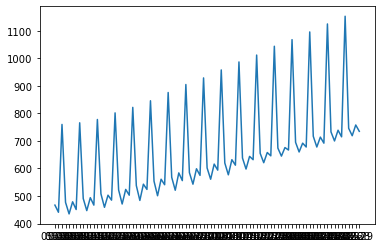

In [52]:
plt.plot(email_sent.date.value_counts().sort_index())

In [42]:
email_table = email_table[email_table.action!="sent_weekly_digest"] #exclude this activity since it does not imply user engagements

In [43]:
email_table

,user_id,occurred_at,action,user_type,date
5,0.0,2014-06-03 09:30:25,email_open,1.0,06-03
7,0.0,2014-06-10 09:30:24,email_open,1.0,06-10
9,0.0,2014-06-17 09:30:23,email_open,1.0,06-17
16,0.0,2014-07-29 09:30:35,email_open,1.0,07-29
20,0.0,2014-08-19 09:30:38,email_open,1.0,08-19
...,...,...,...,...,...
90384,18814.0,2014-08-31 12:12:26,email_open,3.0,08-31
90385,18814.0,2014-08-31 12:12:57,email_clickthrough,3.0,08-31
90386,18815.0,2014-08-31 13:39:56,sent_reengagement_email,2.0,08-31
90387,18815.0,2014-08-31 13:40:14,email_open,2.0,08-31


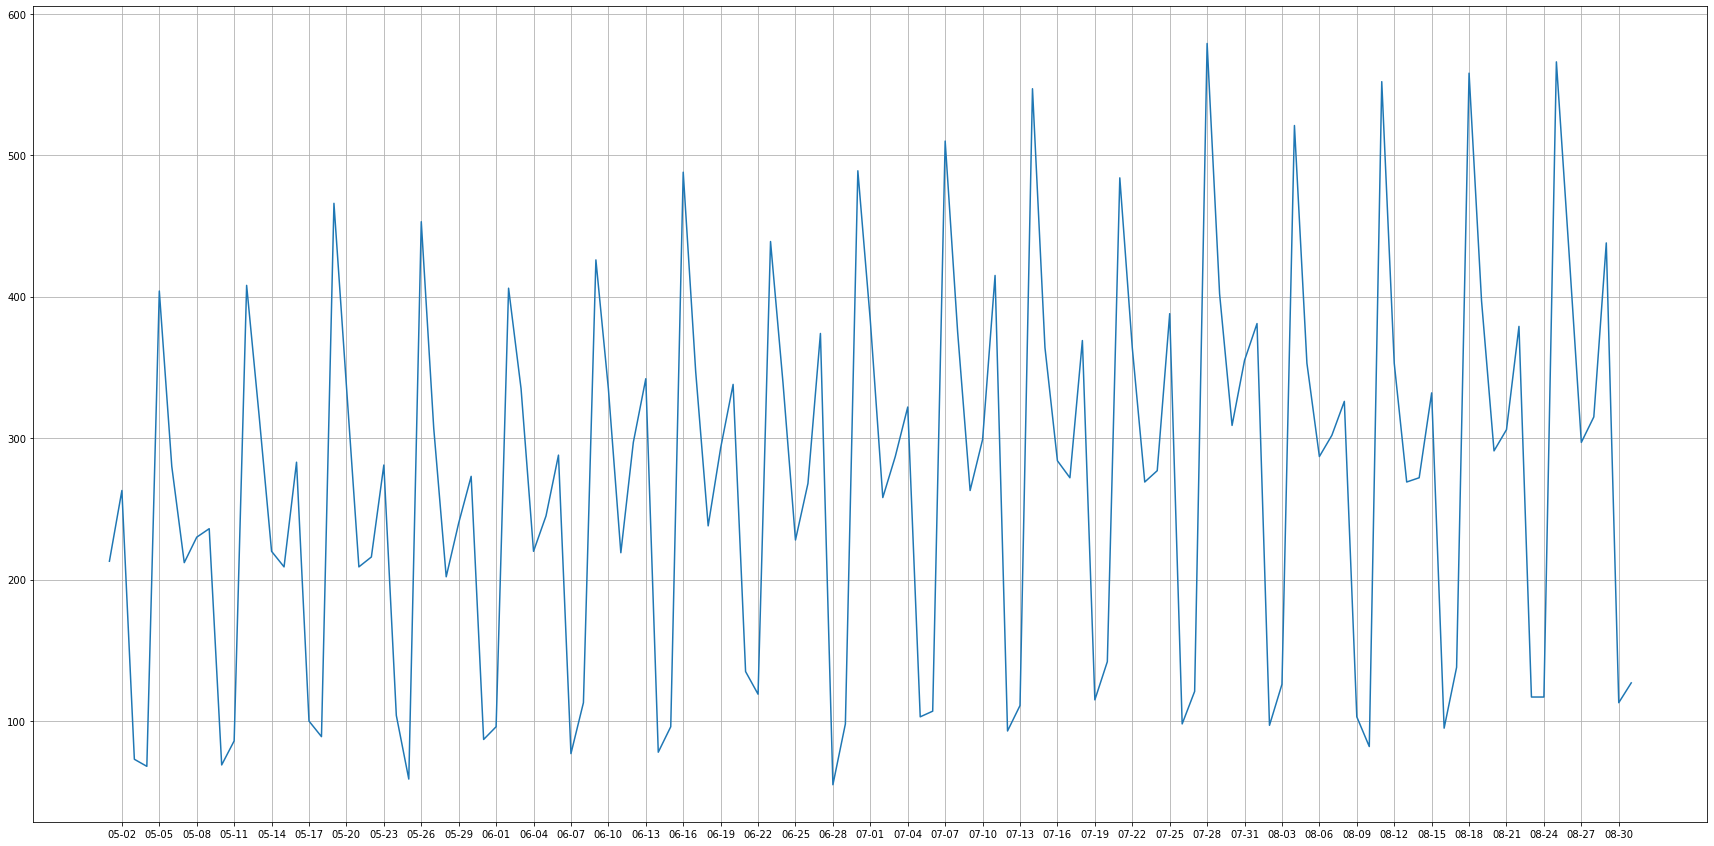

In [44]:
plt.figure(figsize=(30,15))
pic = plt.plot(email_table.date.value_counts().sort_index())
plt.xticks(plt.xticks()[0][1::3])
plt.grid()

Let us see if an engagement with email correlates with higher retention rate in the app, for convenience, we only look at users who have history of openning both datasets

In [67]:
df_event = event_table[event_table['event_type']=='engagement']

In [68]:
df_event_user = df_event.user_id.value_counts().sort_index()

In [73]:
df_email_user = email_table.user_id.value_counts().sort_index()
df_email_user

0.0        5
4.0        9
8.0        4
11.0       7
17.0       5
          ..
18814.0    3
18815.0    3
18895.0    1
18902.0    1
19001.0    1
Name: user_id, Length: 6167, dtype: int64

In [71]:
event_email_table = pd.merge(df_event_user,df_email_user,left_index=True,right_index=True)

In [78]:
event_email_table.rename(columns={'user_id_x': 'Engagement Times', 'user_id_y':'Email Interaction Times'},inplace=True)

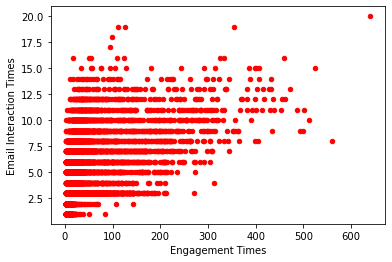

In [79]:
event_email_table.plot(kind='scatter',x='Engagement Times',y='Email Interaction Times',color='red')

The above graph showed that when email interactions are limited, their engagement times are skewed left, however, as they interact more with the emails, their engagement times shift right and become more predictable to a generally postive correlation.

In [82]:
event_table.date.value_counts()

07-18    4641
07-25    4468
07-31    4378
06-27    4358
07-11    4261
         ... 
06-01     786
08-10     783
05-18     748
05-04     745
05-25     727
Name: date, Length: 123, dtype: int64

In [91]:
engagement_table = event_table[event_table.event_type=='engagement']

In [92]:
user_eng_count =engagement_table.user_id.value_counts().sort_index().rename_axis('user_id').to_frame('eng_counts')

In [93]:
user_table['date'] = user_table['created_at'].apply(lambda x: x.split(' ')[0][-5:])

In [99]:
user_table

,user_id,created_at,company_id,language,activated_at,state,date
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,01-01
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending,01-01
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending,01-01
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,01-01
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,01-01
...,...,...,...,...,...,...,...
19061,19061.0,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active,08-31
19062,19062.0,2014-08-31 19:21:23,7520.0,spanish,NaN,pending,08-31
19063,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,08-31
19064,19064.0,2014-08-31 17:45:18,2.0,english,NaN,pending,08-31


In [101]:
df_user_count = pd.merge(user_eng_count, user_table,on='user_id')

In [102]:
df_user_count

,user_id,eng_counts,created_at,company_id,language,activated_at,state,date
0,4.0,93,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,01-01
1,8.0,36,2013-01-01 04:38:30,2698.0,french,2013-01-01 04:40:10,active,01-01
2,11.0,126,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,01-01
3,17.0,55,2013-01-02 10:56:15,5025.0,japanese,2013-01-02 10:57:58,active,01-02
4,19.0,71,2013-01-02 09:54:01,326.0,english,2013-01-02 09:55:34,active,01-02
...,...,...,...,...,...,...,...,...
6137,19056.0,7,2014-08-31 16:35:29,1234.0,english,2014-08-31 16:36:56,active,08-31
6138,19059.0,2,2014-08-31 19:51:59,6817.0,indian,2014-08-31 19:53:43,active,08-31
6139,19060.0,8,2014-08-31 12:19:23,1439.0,japanese,2014-08-31 12:20:48,active,08-31
6140,19061.0,8,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active,08-31


In [111]:
# for date in df_user_count.date.values:
#     print(date)
#     print(df_user_count[df_user_count.date==i].eng_counts.mean())
dates = df_user_count.date.unique()

In [115]:
date_eng_avg = pd.DataFrame(-1,index=dates,columns=['eng_counts_avg'])

In [117]:
for index, row in date_eng_avg.iterrows():
    row.eng_counts_avg = df_user_count[df_user_count.date==index].eng_counts.mean()

([<matplotlib.axis.XTick at 0x2370e6e4550>,
 <a list of 73 Text major ticklabel objects>)

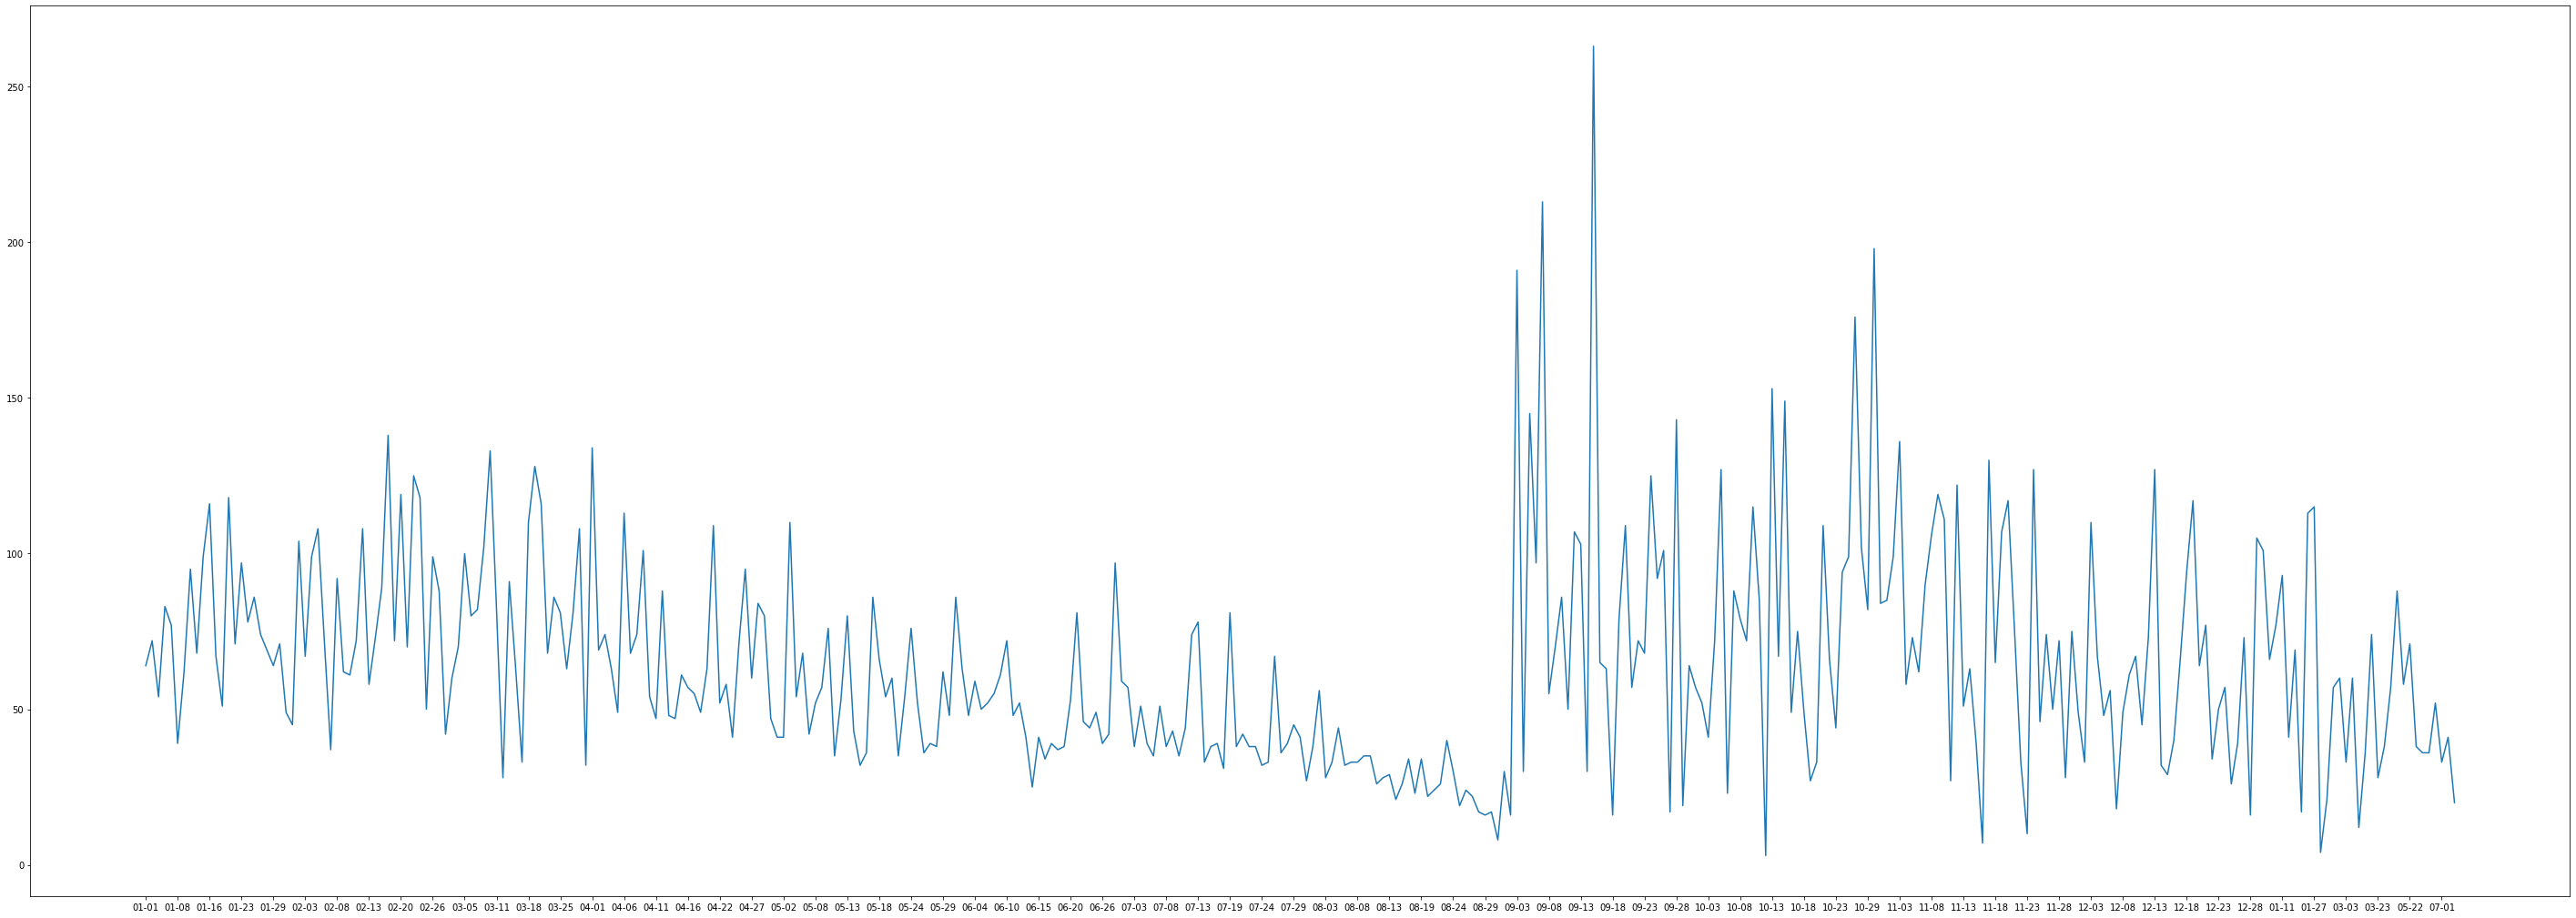

In [124]:
plt.figure(figsize=(50,18))
plt.plot(date_eng_avg)
plt.xticks(date_eng_avg.index[::5])

In [125]:
engagement_table

,user_id,occurred_at,event_type,event_name,location,device,user_type,date
0,4.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0,05-13
1,4.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0,05-13
2,4.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0,05-13
3,4.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0,05-13
4,4.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0,05-24
...,...,...,...,...,...,...,...,...
340822,19063.0,2014-08-31 07:14:09,engagement,search_click_result_4,Brazil,ipad mini,3.0,08-31
340823,19063.0,2014-08-31 07:12:53,engagement,search_autocomplete,Brazil,ipad mini,3.0,08-31
340824,19063.0,2014-08-31 07:13:12,engagement,search_click_result_2,Brazil,ipad mini,3.0,08-31
340825,19063.0,2014-08-31 07:12:37,engagement,home_page,Brazil,ipad mini,3.0,08-31


In [126]:
user_table

,user_id,created_at,company_id,language,activated_at,state,date
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active,01-01
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending,01-01
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending,01-01
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active,01-01
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,01-01
...,...,...,...,...,...,...,...
19061,19061.0,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active,08-31
19062,19062.0,2014-08-31 19:21:23,7520.0,spanish,NaN,pending,08-31
19063,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active,08-31
19064,19064.0,2014-08-31 17:45:18,2.0,english,NaN,pending,08-31


In [127]:
user_demo = user_table[user_table.date=='01-01']

In [134]:
user_table.date.unique()

array(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07',
       '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21',
       '01-22', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28',
       '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04',
       '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11',
       '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18',
       '02-19', '02-20', '02-21', '02-22', '02-23', '02-24', '02-25',
       '02-26', '02-27', '02-28', '03-01', '03-02', '03-03', '03-04',
       '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18',
       '03-19', '03-20', '03-21', '03-22', '03-23', '03-24', '03-25',
       '03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01',
       '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08',
       '04-09', '04-

In [149]:
dates=user_table.date.unique()
date_eng_demo = pd.DataFrame(0, index=dates,columns=['eng_count'])

In [150]:
for user in user_demo.user_id.unique():
    date_record = engagement_table[engagement_table.user_id==user].date.value_counts()
    for item in date_record.iteritems():
        #print(item)
        date_eng_demo.loc[item[0]].eng_count+=item[1]

([<matplotlib.axis.XTick at 0x237156376d8>,
 <a list of 37 Text major ticklabel objects>)

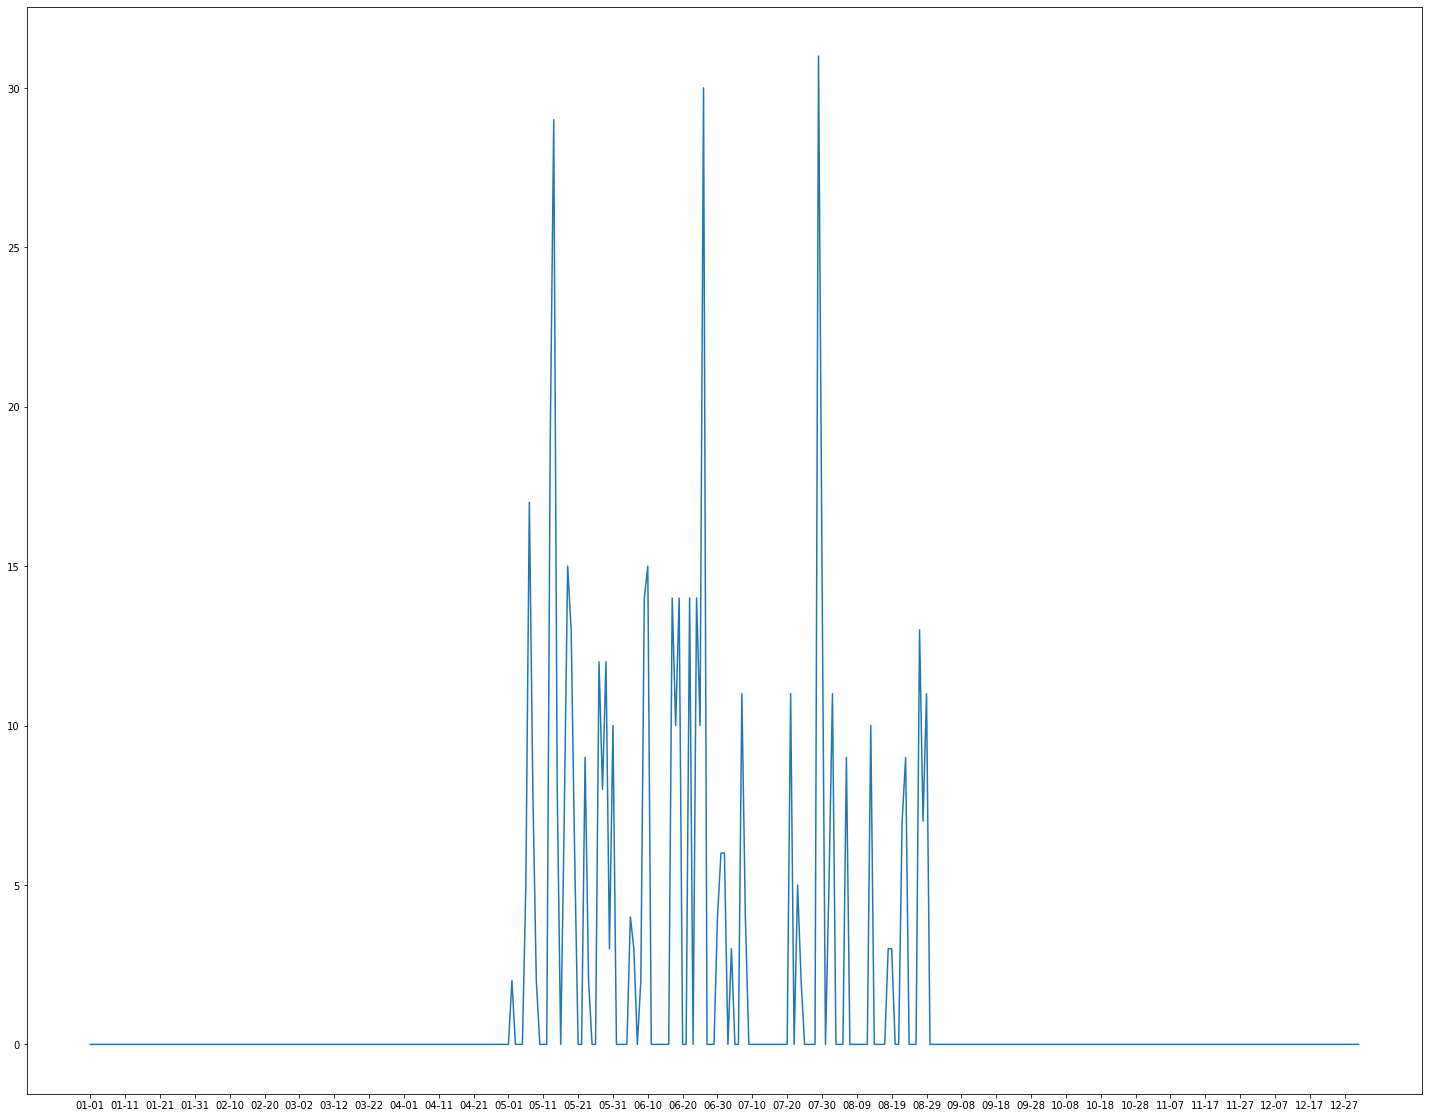

In [158]:
plt.figure(figsize=(25,20))
plt.plot(date_eng_demo)
plt.xticks(date_eng_demo.index[::10])

In [160]:
def user_eng_date(df):
    dates=user_table.date.unique()
    date_eng_demo = pd.DataFrame(0, index=dates,columns=['eng_count'])
    for user in df.user_id.unique():
        date_record = engagement_table[engagement_table.user_id==user].date.value_counts()
    for item in date_record.iteritems():
        date_eng_demo.loc[item[0]].eng_count+=item[1]
    return date_eng_demo

In [164]:
user_table.date.value_counts().head(30)

08-29    124
08-28    123
07-31    120
07-16    120
08-14    119
08-22    119
08-27    117
07-11    117
08-21    113
08-13    112
07-30    112
07-23    112
08-19    111
08-15    108
08-26    108
07-25    106
08-20    105
07-29    104
07-01    104
08-08    104
06-18    104
08-12    103
07-22    103
07-24    103
08-01    102
07-02    102
06-26    101
08-25    101
08-07    101
06-11    100
Name: date, dtype: int64

([<matplotlib.axis.XTick at 0x23714479f28>,
 <a list of 37 Text major ticklabel objects>)

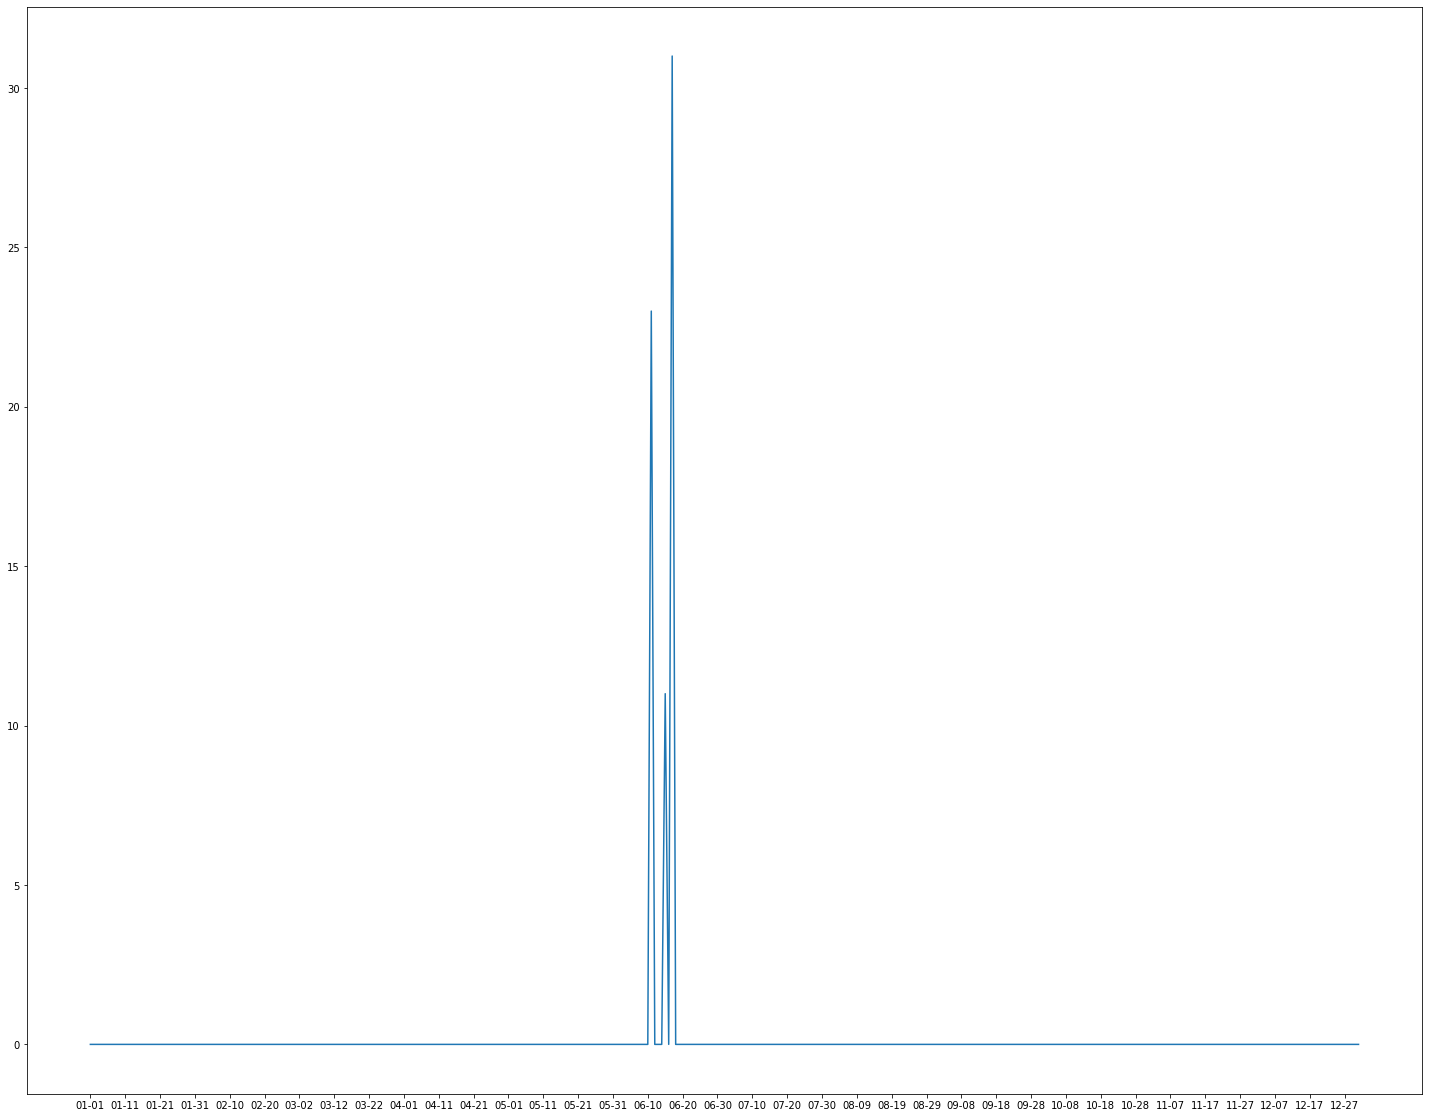

In [170]:
user_eng_0611 = user_eng_date(user_table[user_table.date=="06-11"])
plt.figure(figsize=(25,20))
plt.plot(user_eng_0611)
plt.xticks(user_eng_0611.index[::10])